<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_5_10_b_Risk_Management_Strategy_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step 1: Data Collection

In [35]:
import yfinance as yf  # Importing the yfinance library for fetching financial data

In [36]:
# Define the ticker symbol

In [37]:
tickerSymbol = 'GOOGL'  # Setting the ticker symbol for Google

In [38]:
# Get data on this ticker

In [39]:
tickerData = yf.Ticker(tickerSymbol)  # Creating a Ticker object for the specified symbol

In [40]:
# Get the historical prices for this ticker

In [41]:
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-1')  # Fetching historical data for the specified period


In [42]:
# See your data

In [43]:
print(tickerDf.head())  # Printing the first few rows of the fetched data

                                Open       High        Low      Close  \
Date                                                                    
2010-01-04 00:00:00-05:00  15.689439  15.753504  15.621622  15.684434   
2010-01-05 00:00:00-05:00  15.695195  15.711712  15.554054  15.615365   
2010-01-06 00:00:00-05:00  15.662162  15.662162  15.174174  15.221722   
2010-01-07 00:00:00-05:00  15.250250  15.265265  14.831081  14.867367   
2010-01-08 00:00:00-05:00  14.814815  15.096346  14.742492  15.065566   

                              Volume  Dividends  Stock Splits  
Date                                                           
2010-01-04 00:00:00-05:00   78169752        0.0           0.0  
2010-01-05 00:00:00-05:00  120067812        0.0           0.0  
2010-01-06 00:00:00-05:00  158988852        0.0           0.0  
2010-01-07 00:00:00-05:00  256315428        0.0           0.0  
2010-01-08 00:00:00-05:00  188783028        0.0           0.0  


# step 2: Data Cleaning

In [44]:
# Check for missing values

In [45]:
print(tickerDf.isnull().sum())  # Printing the sum of missing values in each column

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [46]:
# Fill missing values with the previous day's data

In [47]:
tickerDf.fillna(method='ffill', inplace=True)  # Filling missing values with the previous day's data

In [48]:
# Drop any remaining missing values

In [49]:
tickerDf.dropna(inplace=True)  # Dropping any rows with remaining missing values

# step 3: Data Visualization

In [50]:
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization

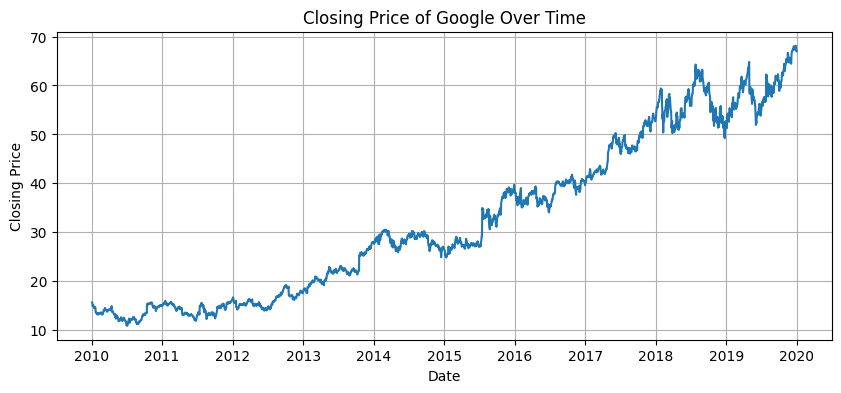

In [51]:
plt.figure(figsize=(10, 4))
plt.plot(tickerDf['Close'])
plt.title('Closing Price of Google Over Time')  # Setting title for the plot
plt.xlabel('Date')  # Setting label for x-axis
plt.ylabel('Closing Price')  # Setting label for y-axis
plt.grid(True)  # Adding grid to the plot
plt.show()

# step 4: Statistical Analysis

In [52]:
# Display descriptive statistics

In [53]:
print(tickerDf.describe())  # Printing descriptive statistics of the data

              Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     32.608668    32.878212    32.317817    32.605593  6.771448e+07   
std      16.429873    16.570217    16.291070    16.437794  5.364856e+07   
min      10.968719    11.068068    10.851602    10.912663  1.041200e+07   
25%      15.970032    16.070508    15.788038    15.893456  3.099900e+07   
50%      28.607057    28.798774    28.295000    28.538501  4.927834e+07   
75%      47.363126    47.635499    47.002249    47.377124  8.902389e+07   
max      68.199997    68.352501    67.650002    68.123497  5.923990e+08   

       Dividends  Stock Splits  
count     2516.0   2516.000000  
mean         0.0      0.000794  
std          0.0      0.039833  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      1.998000  


In [54]:
# Calculate daily returns

In [55]:
tickerDf['returns'] = tickerDf['Close'].pct_change()  # Calculating daily returns

In [56]:
# Plot histogram of returns

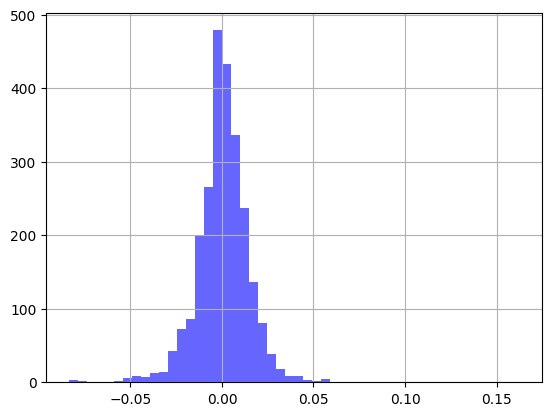

In [57]:
tickerDf['returns'].hist(bins=50, alpha=0.6, color='b')  # Plotting histogram of returns
plt.show()

# step 5: Model Performance Immprovement Techniques

In [59]:
# Feature Engineering

In [60]:
# Calculate the moving average

In [61]:
tickerDf['moving_avg'] = tickerDf['Close'].rolling(window=50).mean()  # Calculating the moving average

In [62]:
# Calculate moving standard deviation

In [63]:
tickerDf['moving_std_dev'] = tickerDf['Close'].rolling(window=50).std()  # Calculating the moving standard deviation

# step 6: VaR Calculation

In [65]:
import numpy as np  # Importing numpy for mathematical operations

In [66]:
# Set the confidence interval

In [67]:
confidence_interval = 0.05  # Setting the confidence interval

In [68]:
# Calculate VaR

In [69]:
VaR = np.percentile(tickerDf['returns'].dropna(), 100 * confidence_interval)  # Calculating VaR at the specified confidence interval


In [70]:
print(f"VaR at {100 * (1-confidence_interval)}% confidence: {VaR}")  # Printing VaR

VaR at 95.0% confidence: -0.022701813202218157


# step 7: Plotting with VaR

In [71]:
# Plotting

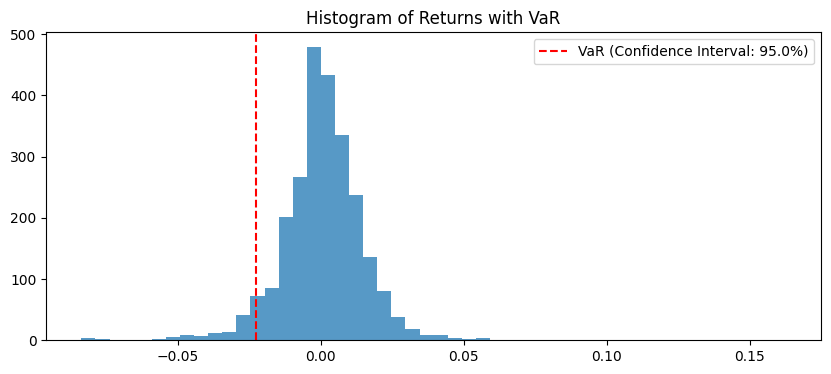

In [72]:
plt.figure(figsize=(10, 4))  # Setting the size of the figure for the plot
plt.hist(tickerDf['returns'].dropna(), bins=50, alpha=0.75)  # Creating a histogram of returns with specified parameters
plt.axvline(x=VaR, color='r', linestyle='--', label=f'VaR (Confidence Interval: {100 * (1-confidence_interval)}%)')  # Adding a vertical line at the VaR value with specified style and label
plt.title('Histogram of Returns with VaR')  # Setting the title for the plot
plt.legend()  # Displaying the legend
plt.show()  # Displaying the plot

# ADDITIONAL TASKS IN THE PROJECT

# Correlation Analysis:

In [76]:
# Calculate correlation matrix

In [77]:
correlation_matrix = tickerDf.corr()  # Compute the correlation matrix of the dataframe

In [78]:
# Plot heatmap of correlation matrix

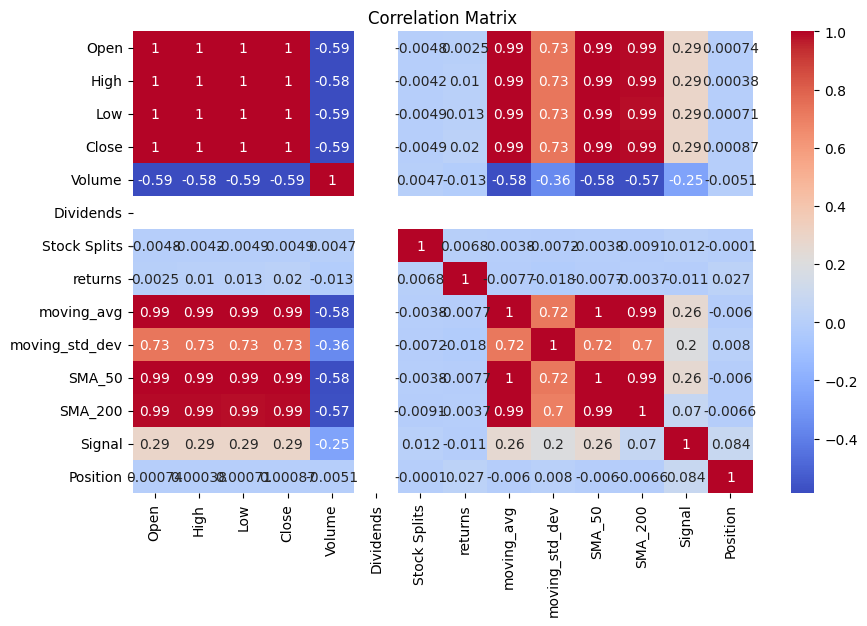

In [79]:
import seaborn as sns  # Import seaborn for plotting
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Plot a heatmap of the correlation matrix with annotations and color map
plt.title('Correlation Matrix')  # Set the title of the plot
plt.show()  # Display the plot

# Trend Analysis:

In [80]:
# Calculate simple moving averages for different time periods

In [82]:
tickerDf['SMA_50'] = tickerDf['Close'].rolling(window=50).mean()  # Calculate the 50-day simple moving average

In [83]:
tickerDf['SMA_200'] = tickerDf['Close'].rolling(window=200).mean()  # Calculate the 200-day simple moving average

In [84]:
# Plot closing price with moving averages

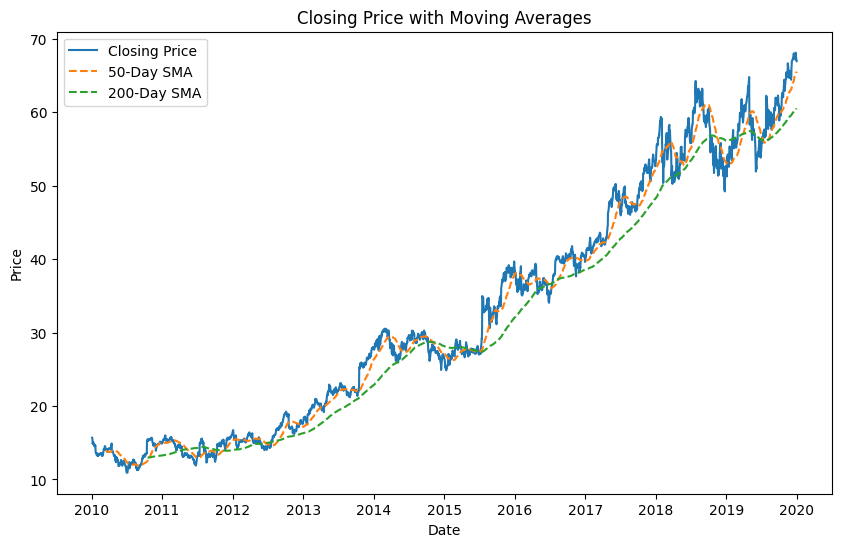

In [85]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(tickerDf['Close'], label='Closing Price')  # Plot the closing price
plt.plot(tickerDf['SMA_50'], label='50-Day SMA', linestyle='--')  # Plot the 50-day SMA with dashed line style
plt.plot(tickerDf['SMA_200'], label='200-Day SMA', linestyle='--')  # Plot the 200-day SMA with dashed line style
plt.title('Closing Price with Moving Averages')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Price')  # Set the label for the y-axis
plt.legend()  # Display the legend
plt.show()  # Display the plot

# Trading Signals:

In [86]:
# Generate buy/sell signals based on moving average crossover strategy

In [87]:
tickerDf['Signal'] = 0  # Initialize the Signal column with zeros

In [88]:
tickerDf['Signal'][50:] = np.where(tickerDf['SMA_50'][50:] > tickerDf['SMA_200'][50:], 1, 0)  # Set signal to buy when 50-day SMA crosses above 200-day SMA, otherwise set to sell

<ipython-input-88-133400eaf7fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerDf['Signal'][50:] = np.where(tickerDf['SMA_50'][50:] > tickerDf['SMA_200'][50:], 1, 0)  # Set signal to buy when 50-day SMA crosses above 200-day SMA, otherwise set to sell


In [89]:
tickerDf['Position'] = tickerDf['Signal'].diff()  # Calculate position changes based on signal differences

In [90]:
# Plot buy/sell signals

Text(0, 0.5, 'Price')

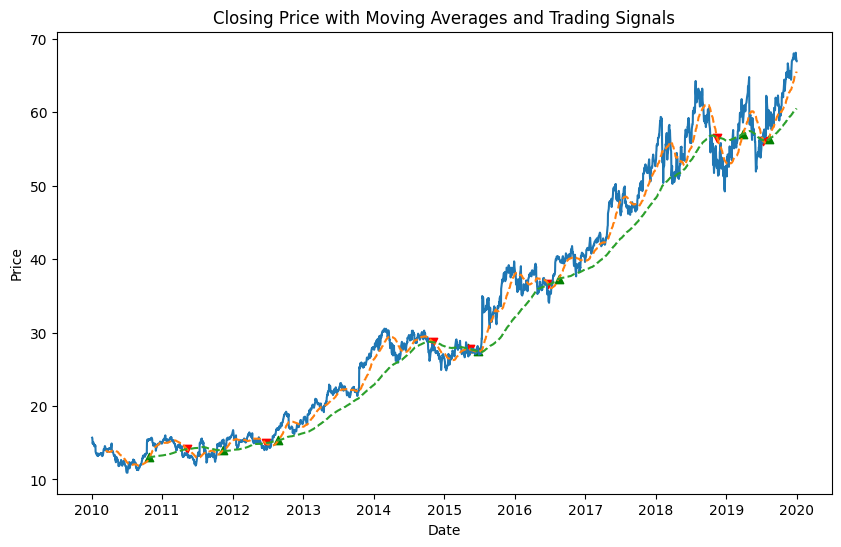

In [91]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(tickerDf['Close'], label='Closing Price')  # Plot the closing price
plt.plot(tickerDf['SMA_50'], label='50-Day SMA', linestyle='--')  # Plot the 50-day SMA with dashed line style
plt.plot(tickerDf['SMA_200'], label='200-Day SMA', linestyle='--')  # Plot the 200-day SMA with dashed line style
plt.scatter(tickerDf[tickerDf['Position'] == 1].index, tickerDf['SMA_50'][tickerDf['Position'] == 1], marker='^', color='g', label='Buy Signal')  # Plot buy signals
plt.scatter(tickerDf[tickerDf['Position'] == -1].index, tickerDf['SMA_50'][tickerDf['Position'] == -1], marker='v', color='r', label='Sell Signal')  # Plot sell signals
plt.title('Closing Price with Moving Averages and Trading Signals')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Price')  # Set the label for the y-axis